In [ ]:
!pip install lightgbm

In [1]:
import pandas as pd
import numpy as np

C:\Users\irfan\anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\irfan\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\irfan\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [20]:
data = pd.read_pickle('NU_2_spatial.pkl')
# data.sort_values('TOD')

In [21]:
data.head()

,quantity,trip_id,driver_id,g_distance,turns,delivery_location,travel_start_location,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear,travel_time
0,19,24309,533.0,11,16,5796,5802,1,1,1,1,42.650000
1,11,24309,533.0,21,12,3429,5341,1,43,1,1,27.250000
2,2,24309,533.0,45,17,5727,3163,2,11,1,1,50.366667
3,25,24309,533.0,5,11,5424,5284,3,1,1,1,21.266667
4,2,24309,533.0,29,14,5517,5017,3,22,1,1,29.583333


In [22]:
cleaned_dataset = data[data.travel_time <= 2*data.g_distance]

In [23]:
cleaned_dataset

,quantity,trip_id,driver_id,g_distance,turns,delivery_location,travel_start_location,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear,travel_time
1,11,24309,533.0,21,12,3429,5341,1,43,1,1,27.250000
2,2,24309,533.0,45,17,5727,3163,2,11,1,1,50.366667
4,2,24309,533.0,29,14,5517,5017,3,22,1,1,29.583333
5,8,24309,533.0,21,17,4561,5097,3,52,1,1,15.616667
7,19,24309,533.0,24,14,4062,4016,4,21,1,1,22.350000
...,...,...,...,...,...,...,...,...,...,...,...,...
37099,2,145588,420.0,103,24,784,5798,4,52,1,4,184.516667
37100,50,145626,555.0,52,13,6837,5798,6,55,1,4,88.516667
37104,1,145579,14753.0,194,19,15411,5798,5,33,1,4,385.716667
37105,1,145758,15347.0,56,21,7099,5798,23,14,1,4,88.150000


In [24]:
from pandas_profiling import ProfileReport

def generate_report(data,report):
    prof_report = ProfileReport(data)
    return prof_report.to_file(output_file= report+'.html')

In [25]:
generate_report(cleaned_dataset,'NU_2_spatial')

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# train_data = data[data.dept_monthofyear < 6]
# test_data = data[data.dept_monthofyear == 6]

from sklearn.model_selection import train_test_split

X = cleaned_dataset.drop(['travel_time'],1)
y = cleaned_dataset['travel_time']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, stratify = X['dept_dayofweek'], random_state=1)

In [ ]:
# train_x, train_y = train_data.drop(['Travel Time'],1), train_data['Travel Time']

In [1]:
import pickle

with open('NU_2_data/train_x.pkl','rb') as f:
    train_x = pickle.load(f)

with open('NU_2_data/train_y.pkl','rb') as f:
    train_y = pickle.load(f)

with open('NU_2_data/test_x.pkl','rb') as f:
    test_x = pickle.load(f)

with open('NU_2_data/test_y.pkl','rb') as f:
    test_y = pickle.load(f)

C:\Users\irfan\anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\irfan\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\irfan\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'learning_rate': [0.001, 0.01, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7],
    'n_estimators': [50,100,200,300,400,500],
    'max_depth': range(2, 12)
}

import warnings
warnings.filterwarnings("ignore")
# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(param_grid=gbm_param_grid, estimator=gbm, 
                        scoring='neg_mean_squared_error', cv=2, verbose=1)

# Fit grid_mse to the data
grid_mse.fit(train_x, train_y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))



Fitting 2 folds for each of 2400 candidates, totalling 4800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4800 out of 4800 | elapsed: 56.5min finished


Best parameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.02, 'max_depth': 8, 'n_estimators': 400}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Lowest RMSE found:  19.78186411095731


In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn import model_selection, preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#Fitting XGB regressor 
model = xgb.XGBRegressor(objective= 'reg:linear', eval_metric= 'rmse',
                         colsample_bytree = 0.6, learning_rate = 0.02, max_depth = 8, n_estimators = 400)
model.fit(train_x,train_y)
print (model)

[10:30:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.02, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [4]:
import pickle

file_name = "xgb_reg_NU_2.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

In [5]:
import pickle

file_name = "xgb_reg_NU_2.pkl"
# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

[10:31:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# test_x, test_y = test_data.drop(['Travel Time'],1), test_data['Travel Time']

In [14]:
test_x

,quantity,driver_id,g_distance,turns,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear
23993,1,892.0,9,17,6,9,5,5
14071,6,427.0,44,22,0,20,3,11
35076,1,215.0,19,18,8,53,3,12
18621,2,598.0,33,22,7,49,3,2
32444,1,780.0,8,16,7,18,1,10
...,...,...,...,...,...,...,...,...
24829,2,747.0,81,18,5,22,5,5
13918,3,70.0,20,15,8,28,1,11
952,1,744.0,64,30,17,9,1,4
5963,1,382.0,14,16,16,50,2,7


In [6]:
# Evaluate Model

from sklearn.metrics import mean_absolute_error, r2_score
import math

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(np.abs(errors / test_labels))
    accuracy = 100 - mape
    MSE = np.square(np.subtract(test_labels,predictions)).mean() 
    RMSE = math.sqrt(MSE)
    R2 = r2_score(test_labels,predictions)
    print('Model Performance')
    print('MAE: {:0.4f} minutes.'.format(np.mean(errors)))
    print('RMSE: {:0.2f}.'.format(RMSE))
    print('R2: {:0.2f}.'.format(R2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('MAPE = {:0.2f}%.'.format(mape))
    
    return accuracy

In [7]:
evaluate(xgb_model_loaded, test_x, test_y)

Model Performance
MAE: 10.6435 minutes.
RMSE: 18.31.
R2: 0.76.
Accuracy = -inf%.
MAPE = inf%.


-inf

In [ ]:
predictions = lgb_model_loaded.predict(test_x)

In [ ]:
pre_ac = pd.DataFrame()

pre_ac['Actual'] = test_y
pre_ac['Prediction'] = predictions
pre_ac['dayofweek'] = test_x['dept_dayofweek']
pre_ac['travels'] = [l for l in range(0,len(predictions))]

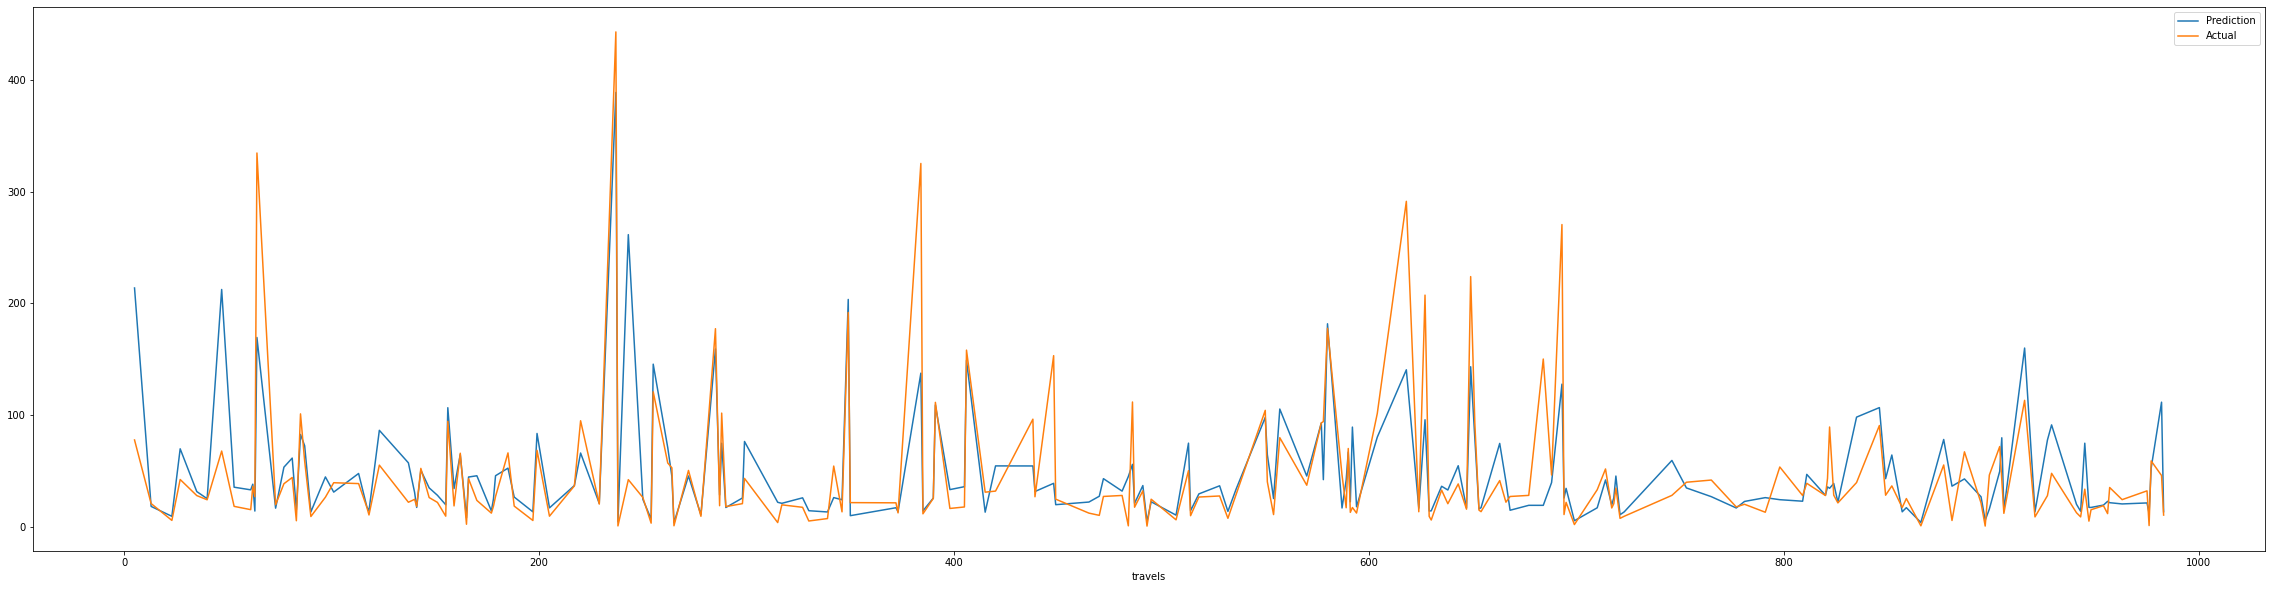

In [ ]:
import matplotlib.pyplot as plt

##### plot according to time of day

pre_ac[pre_ac.dayofweek == 1][0:200].plot(x= "travels" , y=['Prediction', 'Actual'])
plt.rcParams["figure.figsize"] = (40,10)
plt.show()

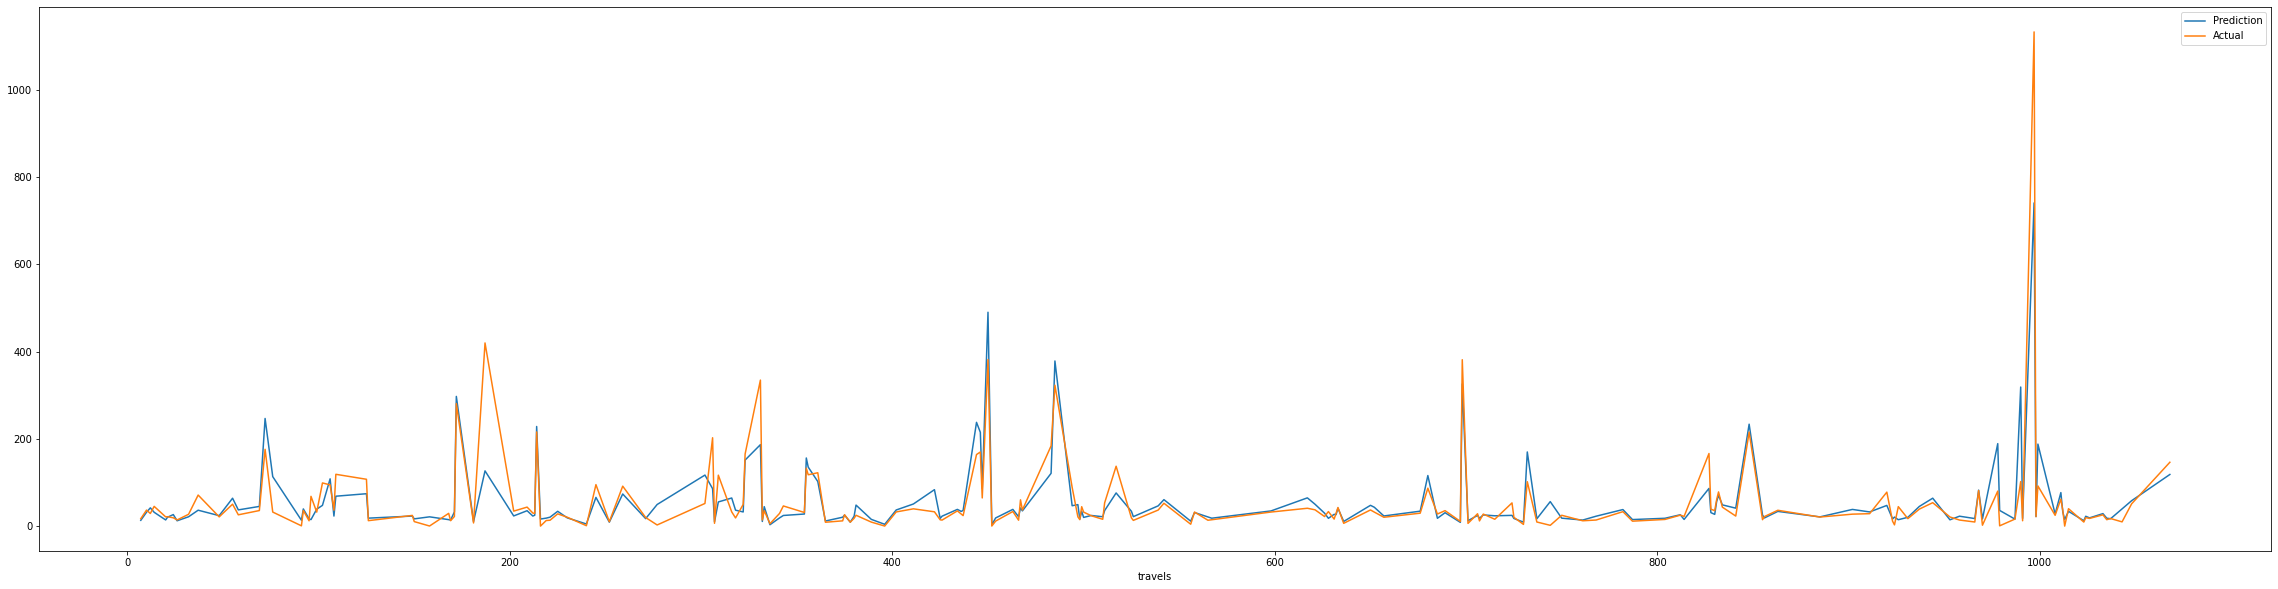

In [ ]:
import matplotlib.pyplot as plt

##### plot according to time of day

pre_ac[pre_ac.dayofweek == 2][0:200].plot(x= "travels" , y=['Prediction', 'Actual'])
plt.rcParams["figure.figsize"] = (40,10)
plt.show()

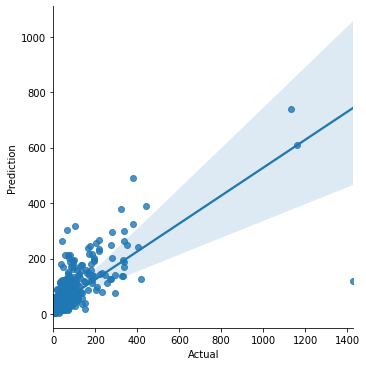

In [ ]:
import seaborn as sns

sns.lmplot(x="Actual", y="Prediction", data=pre_ac[0:1000]);

In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 14.1MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491615 sha256=037329b91b6170f10dcd4af92e70a32170e3f502c6461c5a5da5f6af0e3da9c8
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [9]:
import shap
 
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.TreeExplainer(xgb_model_loaded)
shap_values = explainer.shap_values(test_x)

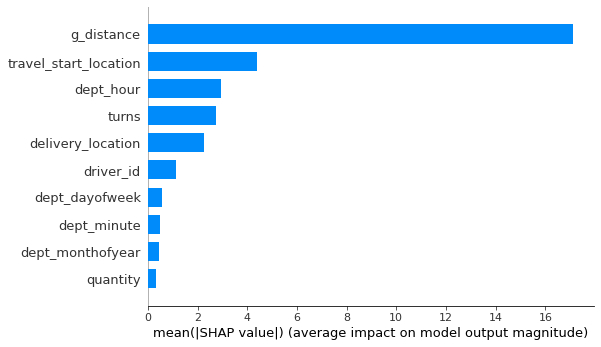

In [10]:
shap.summary_plot(shap_values, train_x, feature_names = test_x.columns, plot_type="bar")

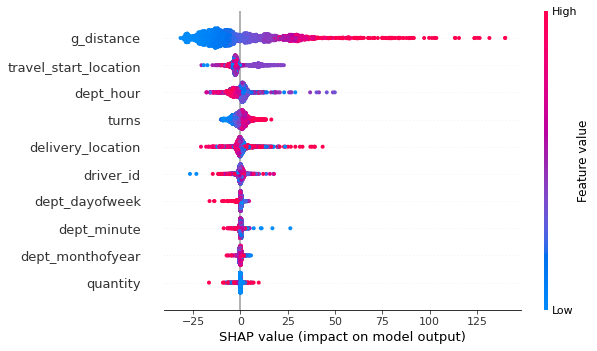

In [11]:
import matplotlib.pyplot as plt

f = plt.figure()
shap.summary_plot(shap_values, test_x, feature_names = test_x.columns)

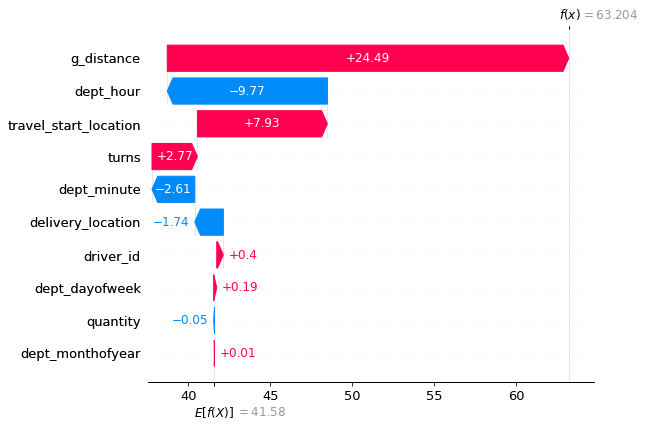

In [12]:
'''The explanation below shows features each contributing to push the model output from the base value 
(the average model output over the training dataset we passed) to the model output. Features pushing the 
prediction higher are shown in red, those pushing the prediction lower are in blue.'''


shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0], feature_names = test_x.columns, show = True)

In [13]:
shap.initjs()
# visualize the first prediction's explanation with a force plot
shap.force_plot(explainer.expected_value, shap_values[0], feature_names = test_x.columns, show = True)

In [14]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0:100], feature_names = test_x.columns, show = True)

In [ ]:
# !pip install lime

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(train_x, feature_names=test_x.columns, class_names=['Travel Time'], verbose=True, mode='regression')